In [1]:
# Python Machine Learning utilities
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print("class labels: ", np.unique(y))

class labels:  [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

# Split into 30% test and 70% train
# Using random_state=1 ensures results are reproducible
# stratify=Y means method returns training and test subsets with same proportions of class labels as input data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

print('Labels count in y: ', np.bincount(y))
print('Labels count in y_train: ', np.bincount(y_train))
print('Labels count in y_test: ', np.bincount(y_test))

Labels count in y:  [50 50 50]
Labels count in y_train:  [35 35 35]
Labels count in y_test:  [15 15 15]


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Compute the mean and std to be used for later scaling.
sc.fit(X_train)
# Standardize training and test data using estimated parameters, mu and sigma, calculated in sc.fit()
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron
#eta0 equivalent to the learning rate
ppn = Perceptron(max_iter =40,eta0=0.1,random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Missclassified samples: %d' % (y_test !=y_pred).sum())

Missclassified samples: 3


In [5]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std,y_test))

Accuracy: 0.93
Accuracy: 0.93


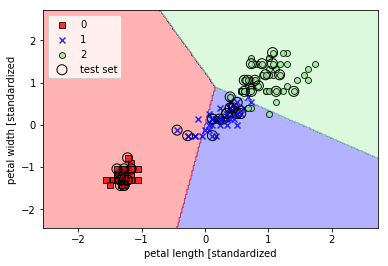

In [6]:
from DataScienceProjects.Python_Machine_Learning.utils import plot_decision_regions
import matplotlib.pyplot as plt

X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))

plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.show()

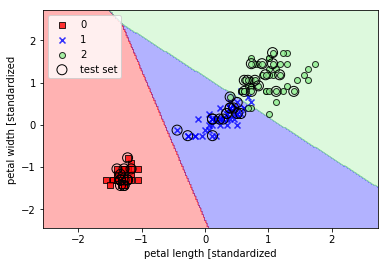

array([[  3.20136878e-08,   1.46953648e-01,   8.53046320e-01],
       [  8.34428069e-01,   1.65571931e-01,   4.57896429e-12],
       [  8.49182775e-01,   1.50817225e-01,   4.65678779e-13],
       [  4.99230003e-05,   6.43956438e-01,   3.55993639e-01]])

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std,y_train)
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=lr,test_idx=range(105,150))

plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.show()

# Probability that first three training examples belong to a particular class
lr.predict_proba(X_test_std[:4,:])

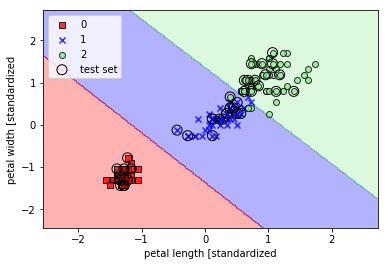

In [12]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_std,y_train)
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=svm,test_idx=range(105,150))

plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.show()

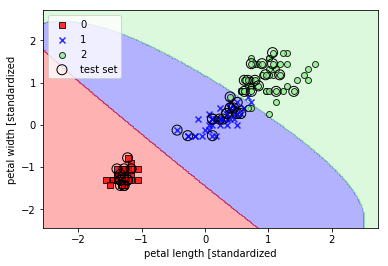

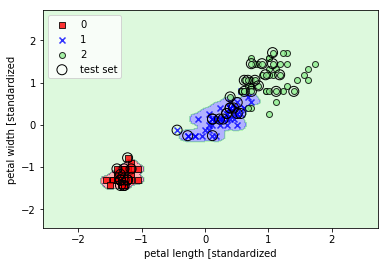

In [17]:
svm1 = SVC(kernel='rbf',C=1.0,random_state=1,gamma=0.2)
svm1.fit(X_train_std,y_train)
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=svm1,test_idx=range(105,150))

plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.show()

svm2 = SVC(kernel='rbf',C=1.0,random_state=1,gamma=100.0)
svm2.fit(X_train_std,y_train)
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=svm2,test_idx=range(105,150))

plt.xlabel('petal length [standardized')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.show()

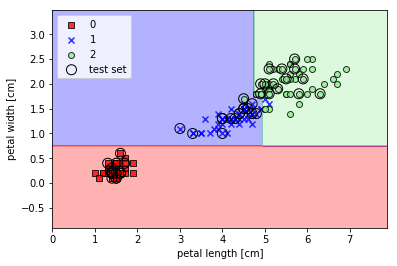

In [19]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train,y_train)
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined,y=y_combined,classifier=tree,test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

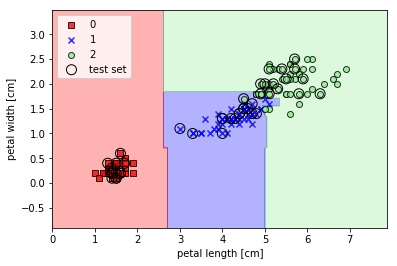

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=1)
forest.fit(X_train,y_train)
plot_decision_regions(X=X_combined,y=y_combined,classifier=forest,test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

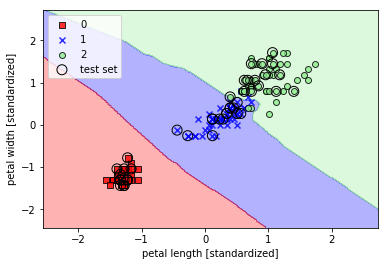

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std,y_train)
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=knn,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()